PROYECTO INDIVIDUAL N°1

In [169]:
import ast 
import pandas as pd
from typing import Dict

In [170]:
pip list

Package              VersionNote: you may need to restart the kernel to use updated packages.

-------------------- -----------
annotated-types      0.5.0
anyio                3.7.1
asttokens            2.2.1
backcall             0.2.0
certifi              2023.5.7
charset-normalizer   3.1.0
click                8.1.6
colorama             0.4.6
comm                 0.1.3
contourpy            1.0.7
cycler               0.11.0
debugpy              1.6.6
decorator            5.1.1
dnspython            2.4.1
email-validator      2.0.0.post2
et-xmlfile           1.1.0
executing            1.2.0
fastapi              0.100.1
fonttools            4.39.4
h11                  0.14.0
httpcore             0.17.3
httptools            0.6.0
httpx                0.24.1
idna                 3.4
ipykernel            6.22.0
ipython              8.11.0
itsdangerous         2.1.2
jedi                 0.18.2
Jinja2               3.1.2
joblib               1.3.1
jupyter_client       8.1.0
jupyter_core      

In [232]:
rows = []
with open ('steam_games.json', encoding = 'utf-8') as f: # f contains the data of the archive
    for line in f.readlines():
        rows.append(ast.literal_eval(line))

df1 = pd.DataFrame(rows)
df1['release_date'] = pd.to_datetime(df1['release_date'], format='%Y-%m-%d', errors='coerce')
dff = df1.dropna(subset= ['release_date'])
dff['release_date'] = pd.to_datetime(dff['release_date'])

C:\Users\USER\AppData\Local\Temp\ipykernel_10340\3863025531.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['release_date'] = pd.to_datetime(dff['release_date'])


In [241]:
df_anid = dff.explode('genres')

In [254]:
def genero(year: int):
    df = df_anid[['release_date','genres']]
    years = pd.to_datetime(year,format = '%Y').to_period('Y')
    df_filter = df[df['release_date'].dt.to_period('Y') == years]
    df_top = df_filter['genres'].value_counts()
    top_genres = df_top.head(5)
    return {year: top_genres.to_dict()}

In [260]:
genero(2019)

{2019: {'Action': 2, 'Adventure': 2, 'Indie': 2, 'RPG': 2, 'Strategy': 1}}

In [ ]:
def juegos(year: int):
    df = dff[['release_date','app_name']]
#Convert the time to datetime object.Then it converts the datetime object to period object with a yearly frequency
    years = pd.to_datetime(year,format = '%Y').to_period('Y')
#Filter the selectiong the rows only when the period is equal to the year stored in the variable
    df_filter = df[df['release_date'].dt.to_period('Y') == years]
#Converted the column into a list and contain it in the variable
    juegos_lanzados = df_filter['app_name'].astype(str).tolist()
    juegos_dict = {juego for juego in juegos_lanzados}
    return {year: juegos_dict}

In [280]:
print(juegos(2014))

{2014: {"Nobunaga's Ambition: Souzou - Scenario Dokuganryutatsu", 'Unhack Demo', 'Starlite: Astronaut Rescue - Developed in Collaboration with NASA', 'Freedom Fall', 'Train Simulator: Union Pacific GP50 Loco Add-On', 'Train Simulator: EWS Class 92 Loco Add-On', 'Blade Symphony', 'Hive - The Pillbug', 'The Game of Gnomes', "Bosch's Damnation", 'Call of Duty®: Ghosts - Blunt Force Character Pack', 'Total War: ROME II - Hannibal at the Gates Campaign Pack', 'Watch_Dogs™', 'Fantasy Grounds - C&C: Of Gods and Monsters', 'Crystal Chip Collector', 'Quest of Dungeons', 'Dwelvers Demo', 'Commando Jack', "Shannon Tweed's Attack Of The Groupies", 'Shovel Knight: Treasure Trove Soundtrack Collection', 'Jamsouls', "Gary Grigsby's War in the West", 'Our Darker Purpose', 'Jacob Jones and the Bigfoot Mystery : Episode 1', '100% Orange Juice - Syura & Nanako Character Pack', 'Sniper Elite 3 - Save Churchill Part 3: Confrontation', 'Heavy Fire: Afghanistan', 'Anmynor Puzzles', 'Faceted Oculi Pack', 'Heg

In [294]:
def specs(year: int):
    df = dff[['release_date','specs']]
    years = pd.to_datetime(year,format = '%Y').to_period('Y')
    df_filter = df[df['release_date'].dt.to_period('Y') == years]
    df_filter = df_filter.explode('specs')
    df_top = df_filter['specs'].value_counts()
    top_specs = df_top.head(5)
    return {year: top_specs.to_dict()}

In [296]:
specs(2014)

{2014: {'Single-player': 2481,
  'Steam Achievements': 1722,
  'Steam Trading Cards': 1384,
  'Downloadable Content': 1338,
  'Steam Cloud': 1217}}

In [301]:
def earlyaccess(year: int):
    df = dff[['release_date','early_access']]
    years = pd.to_datetime(year,format = '%Y').to_period('Y')
    df_filter = df[df['release_date'].dt.to_period('Y') == years]    
    juegos_early = df_filter['early_access']
    juegos_dict = {juego for juego in juegos_early if juego == True}
    return {year: juegos_dict}
    

In [321]:
def earlyaccess(year: int):
    df = dff[['release_date','early_access']]
    years = pd.to_datetime(year,format = '%Y').to_period('Y')
    df_filter = df[df['release_date'].dt.to_period('Y') == years]    
    juegos_early = df_filter['early_access']
    num_early_access = juegos_early.value_counts() #Sum the true values of the juegos_early variable
    return {year: num_early_access.to_dict()}

In [322]:
earlyaccess(2018)

{2018: {False: 75, True: 21}}

In [360]:
def sentiment( year : int):
    dfs = dff[['sentiment','release_date']]
    #Use isin to created a boolean series that indicate the value of the column
    #The ~ operator is used to invert the boolean series. 
    mask = ~dfs['sentiment'].isin(['Overwhelmingly Positive','Mostly Positive','Very Positive','Positive', 'Mixed', 'Negative','Mostly Negative','Very Negative','Overwhelmingly Negative'])
    #Select the rows where the mask is True and set that values in the column for None
    dfs.loc[mask, 'sentiment'] = 'None'
    years = pd.to_datetime(year,format = '%Y').to_period('Y')
    df_filter = dfs[dfs['release_date'].dt.to_period('Y') == years]    
    critics = df_filter['sentiment']
    num_critics = critics.value_counts() #Count the values True and False of the column
    return {year: num_critics.to_dict()}
    

In [361]:
sentiment(2014)

{2014: {'None': 1196,
  'Mixed': 467,
  'Very Positive': 429,
  'Mostly Positive': 333,
  'Positive': 236,
  'Mostly Negative': 99,
  'Overwhelmingly Positive': 37,
  'Negative': 27,
  'Very Negative': 7,
  'Overwhelmingly Negative': 1}}

ANALISIS EXPLORATORIO DE DATOS

Primero vamos a limpiar los datos con el fin de trabajar el modelo con datos limpios

In [3]:
# import the libraries
import numpy as np
import pandas as pd
import ast

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn.tree import DecisionTreeClassifier

import sklearn.metrics as metrics
from sklearn.model_selection import learning_curve

In [4]:
rows = []
with open ('steam_games.json', encoding = 'utf-8') as f: # f contains the data of the archive
    for line in f.readlines():
        rows.append(ast.literal_eval(line))

df1 = pd.DataFrame(rows)
df1['release_date'] = pd.to_datetime(df1['release_date'], format='%Y-%m-%d', errors='coerce')
dff = df1.dropna(subset= ['release_date'])
dff['release_date'] = pd.to_datetime(dff['release_date'])

C:\Users\USER\AppData\Local\Temp\ipykernel_25804\3863025531.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['release_date'] = pd.to_datetime(dff['release_date'])


In [5]:
#Drop the NaN in metascore
dfc1 = dff.dropna(subset = 'metascore')

In [6]:
#Replace de # user reviews using r'\d+ user reviews', r to indicate a raw str, \d+ to matches 0-9 digits and more than one digit
dfc1['sentiment'] = dff['sentiment'].replace(to_replace=r'\d+ user reviews', value='No available', regex=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_25804\3956361175.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc1['sentiment'] = dff['sentiment'].replace(to_replace=r'\d+ user reviews', value='No available', regex=True)


In [7]:
dfc2 = dfc1

In [8]:
#Replace the Na in metascore an transform to Int
dfc1['metascore'] = dfc1['metascore'].replace('NA', np.nan)
dfc2['metascore'] = dfc1['metascore'].astype('Int64')

C:\Users\USER\AppData\Local\Temp\ipykernel_25804\3728205211.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc1['metascore'] = dfc1['metascore'].replace('NA', np.nan)
C:\Users\USER\AppData\Local\Temp\ipykernel_25804\3728205211.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc2['metascore'] = dfc1['metascore'].astype('Int64')


In [9]:
#Replace the Na in price an transform to str
dfc1['price'] = dfc1['price'].replace('NA', np.nan)
dfc2['price'] = dfc1['price'].astype('str')

C:\Users\USER\AppData\Local\Temp\ipykernel_25804\1774879515.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc1['price'] = dfc1['price'].replace('NA', np.nan)
C:\Users\USER\AppData\Local\Temp\ipykernel_25804\1774879515.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc2['price'] = dfc1['price'].astype('str')


In [10]:
#Unnest the colum genres in df_anid
df_anid = dfc2.explode('genres')

In [11]:
#Select from the dataframe the columns to work
df_anid = df_anid[['release_date','genres','early_access','price','metascore','sentiment']]

In [12]:
df_anid = df_anid.dropna()

In [14]:
df_anid.head(5)

,release_date,genres,early_access,price,metascore,sentiment
28,1998-11-08,Action,False,9.99,96,Overwhelmingly Positive
39,2006-07-06,Strategy,False,6.99,84,Mostly Positive
40,2006-07-06,Strategy,False,6.99,80,Very Positive
41,2006-07-11,Action,False,9.99,76,Very Positive
41,2006-07-11,Indie,False,9.99,76,Very Positive


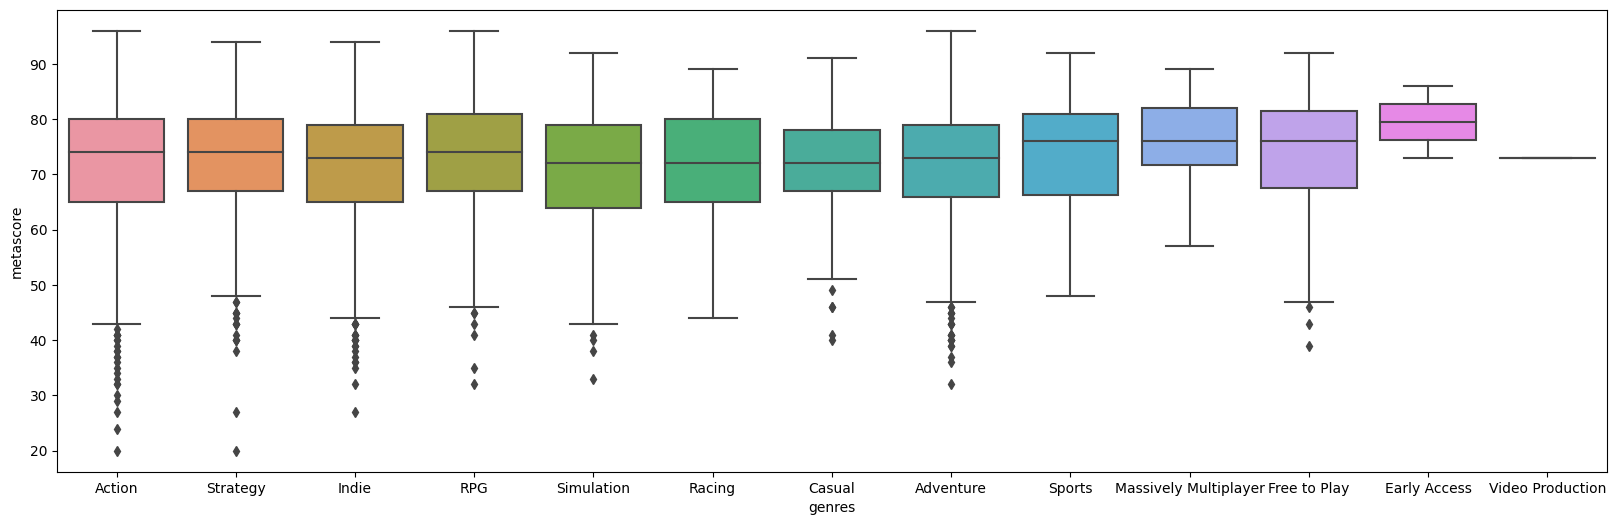

In [119]:
plt.figure(figsize=(20, 6))
sns.boxplot(x='genres', y='metascore', data=df_anid)
plt.show()